# Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go

# Load the dataset

In [2]:
# Load the dataset
file_path = 'europe.csv'
europe_data = pd.read_csv(file_path)

# Display the first few rows
#print(europe_data.head())

# Visualize the Variables with Boxplots

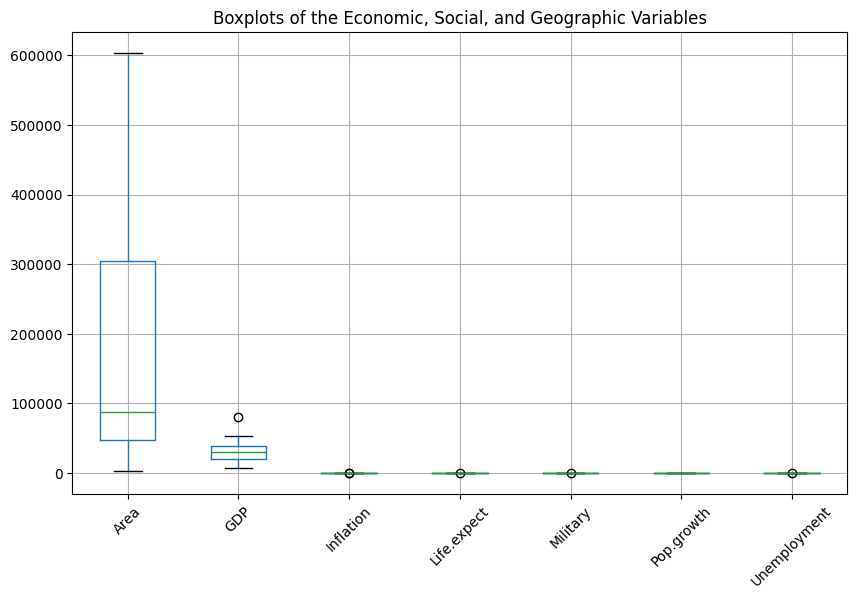

In [3]:
# Set up a larger figure for multiple boxplots
plt.figure(figsize=(10, 6))

# Plot a boxplot for each numeric column
europe_data.drop(columns=['Country']).boxplot()

# Display the plot
plt.title('Boxplots of the Economic, Social, and Geographic Variables')
plt.xticks(rotation=45)
plt.show()

# Visualization of Standardized Data

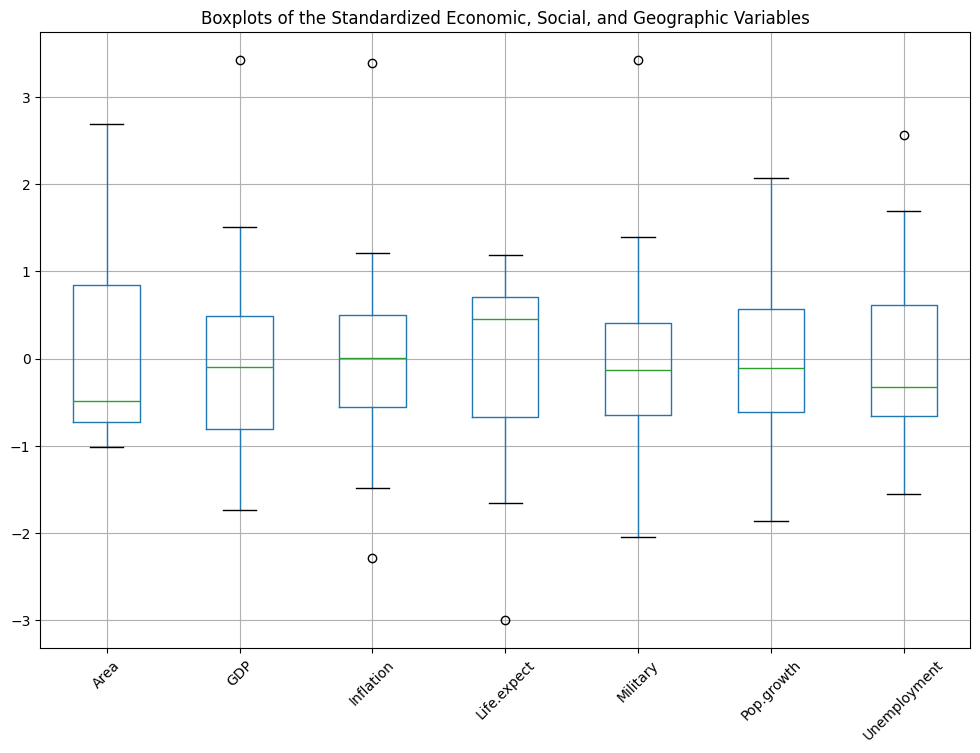

In [4]:
# Extract numeric data and standardize it
numeric_data = europe_data.drop(columns=['Country'])
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

# Convert the standardized data back to a DataFrame for easier interpretation
standardized_df = pd.DataFrame(standardized_data, columns=numeric_data.columns)

# Set up a larger figure for multiple boxplots
plt.figure(figsize=(12, 8))

# Plot a boxplot for the standardized columns
standardized_df.boxplot()

# Display the plot
plt.title('Boxplots of the Standardized Economic, Social, and Geographic Variables')
plt.xticks(rotation=45)
plt.show()

# Covariance Matrix

**It shows the relationship between each pair of variables. A positive covariance indicates that the two variables tend to increase together, while a negative covariance suggests that as one increases, the other decreases. A value near zero means there's little to no linear relationship.**

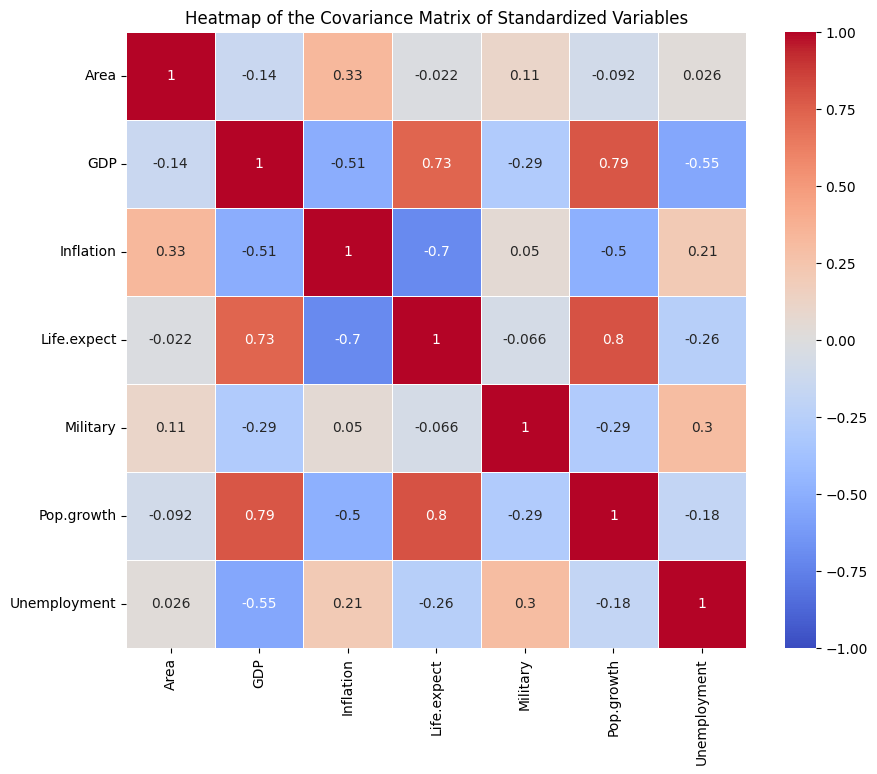

In [5]:
# Calculate the covariance matrix for the standardized dataset
covariance_matrix = standardized_df.cov()

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot a heatmap for the covariance matrix with color limits (-1, 1)
sns.heatmap(covariance_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Heatmap of the Covariance Matrix of Standardized Variables')
plt.show()

# Correlation Matrix

**Shows the linear relationships between the variables. Correlation values range from:**

* **+1: Perfect positive correlation.**
* **0: No linear correlation.**
* **-1: Perfect negative correlation.**

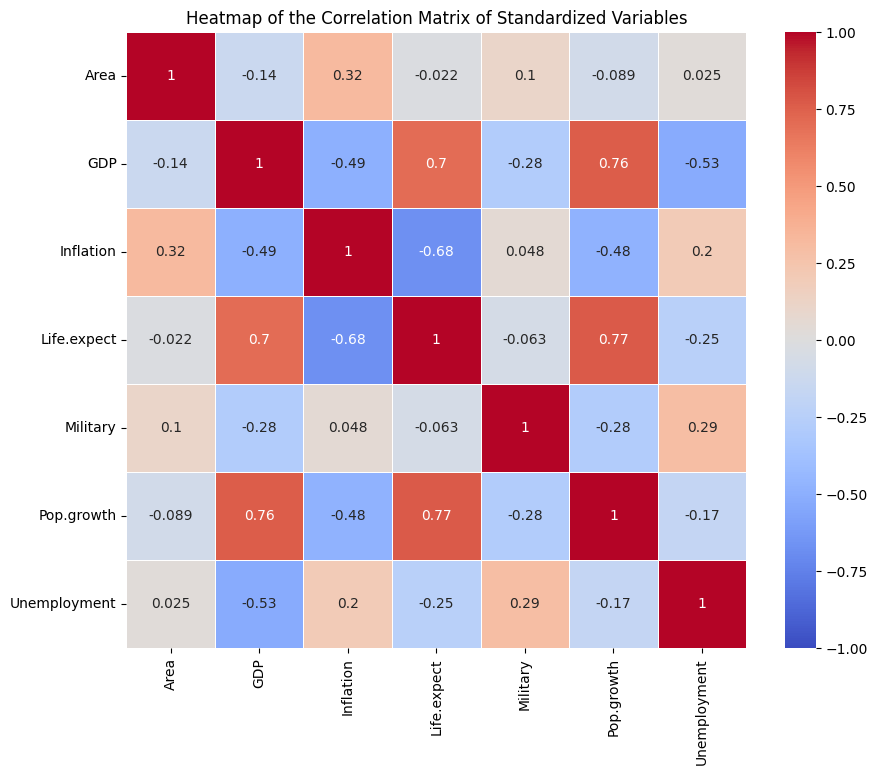

In [6]:
# Calculate the correlation matrix for the standardized dataset
correlation_matrix = standardized_df.corr()

# Set up the figure
plt.figure(figsize=(10, 8))

# Plot a heatmap for the correlation matrix with color limits (-1, 1)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)

# Add titles and labels
plt.title('Heatmap of the Correlation Matrix of Standardized Variables')
plt.show()

In this matrix, we observe that some variables are correlated with others, particularly those closer to 1, which indicates a strong positive correlation. For example, GDP is positively correlated with Life Expectancy and Population Growth. These three variables show a positive relationship according to the correlation matrix.

On the other hand, some variables, such as Area with Military spending and Area with Unemployment, appear to have little to no correlation, as their values are close to zero.

Finally, we see a negative correlation between Inflation and Life Expectancy, as well as between GDP and Inflation and between Unemployment and GDP. These negative correlations suggest that as Inflation increases, both GDP and Life Expectancy tend to decrease, and higher GDP is associated with lower Unemployment.

**With this said, we observe both positive and negative correlations between some variables. Given these relationships, it makes sense to perform a PCA (Principal Component Analysis) to reduce the dimensionality of the dataset and capture the most important patterns in the data.**

# Perform PCA

Understanding that we have $n=28$ countries and $p=7$ features, we proceed to transform the dataset in such a way that the variance of the new set of components is maximized.

In [34]:
# Step 1: Compute the correlation matrix
correlation_matrix = np.corrcoef(standardized_data.T)

# Step 1: Compute eigenvalues and eigenvectors of the correlation matrix
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Display eigenvalues and eigenvectors
print("Eigenvalues:\n", eigenvalues)
print("Eigenvectors :\n", eigenvectors)

# Step 3: Project the original data onto the principal components (manual PCA)
# This is the same as computing PC_i manually
pca_components_manual = np.dot(standardized_data, eigenvectors)

# Create a DataFrame for the PCA results (manual)
pca_df_manual = pd.DataFrame(pca_components_manual, columns=[f'PC{i+1}' for i in range(pca_components_manual.shape[1])])

# Step 4: Compare explained variance (from sklearn PCA) and manually
pca = PCA()
pca.fit(standardized_data)
explained_variance = pca.explained_variance_ratio_

print("Explained variance by sklearn PCA:\n", explained_variance)

# Explained variance from eigenvalues (manual)
explained_variance_manual = eigenvalues / np.sum(eigenvalues)
print("Explained variance by manual calculation:\n", explained_variance_manual)

Eigenvalues:
 [3.22716568 1.18712341 1.06319053 0.45784862 0.12564189 0.16867389
 0.77035598]
Eigenvectors :
 [[ 1.24873902e-01 -1.72872202e-01  8.98296740e-01 -3.24016926e-01
  -6.66428246e-02  1.90118083e-01  4.48503976e-02]
 [-5.00505858e-01 -1.30139553e-01  8.39557607e-02  3.90632444e-01
   3.97408435e-01  6.38657073e-01 -8.42554739e-02]
 [ 4.06518155e-01 -3.69657243e-01  1.98194675e-01  6.89500539e-01
   2.26700295e-01 -3.23867263e-01  1.64685649e-01]
 [-4.82873325e-01  2.65247797e-01  2.46082460e-01 -1.01786561e-01
   5.07031305e-01 -6.06434187e-01  2.67714373e-02]
 [ 1.88111616e-01  6.58266888e-01  2.43679433e-01  3.68147581e-01
  -1.37309597e-01  3.55960680e-02 -5.62374796e-01]
 [-4.75703554e-01  8.26219831e-02  1.63697207e-01  3.47867772e-01
  -6.71146682e-01 -1.20855625e-01  3.92462767e-01]
 [ 2.71655820e-01  5.53203705e-01  5.00135736e-04  1.01587422e-02
   2.44662434e-01  2.59704965e-01  7.01967912e-01]]
Explained variance by sklearn PCA:
 [0.46102367 0.16958906 0.15188436 

In [39]:
# Step 4: Analyze loadings per country
# Create a DataFrame for loadings (eigenvectors)
loadings_df = pd.DataFrame(eigenvectors, index=numeric_data.columns, columns=[f'PC{i+1}' for i in range(eigenvectors.shape[1])])

# Combine country data with PCA component values
countries_pc_df = pd.concat([europe_data['Country'], pca_df_manual], axis=1)

# Display the results for loadings
print("Loadings (Eigenvectors):\n", loadings_df)

Loadings (Eigenvectors):
                    PC1       PC2       PC3       PC4       PC5       PC6  \
Area          0.124874 -0.172872  0.898297 -0.324017 -0.066643  0.190118   
GDP          -0.500506 -0.130140  0.083956  0.390632  0.397408  0.638657   
Inflation     0.406518 -0.369657  0.198195  0.689501  0.226700 -0.323867   
Life.expect  -0.482873  0.265248  0.246082 -0.101787  0.507031 -0.606434   
Military      0.188112  0.658267  0.243679  0.368148 -0.137310  0.035596   
Pop.growth   -0.475704  0.082622  0.163697  0.347868 -0.671147 -0.120856   
Unemployment  0.271656  0.553204  0.000500  0.010159  0.244662  0.259705   

                   PC7  
Area          0.044850  
GDP          -0.084255  
Inflation     0.164686  
Life.expect   0.026771  
Military     -0.562375  
Pop.growth    0.392463  
Unemployment  0.701968  


In [40]:
# Display the results for PCA components
print("\nPrincipal Components for each country:\n", countries_pc_df)


Principal Components for each country:
            Country       PC1       PC2       PC3       PC4       PC5  \
0          Austria -1.081748 -1.270051 -0.514803  0.001251  0.575549   
1          Belgium -0.681094 -0.416041 -0.687292  0.273518  0.480972   
2         Bulgaria  2.609879  0.269638 -0.623031  0.001946  0.025134   
3          Croatia  1.270149  1.901427 -0.831925 -0.377894 -0.299664   
4   Czech Republic -0.167209 -0.131943 -1.001979 -1.047409 -0.115020   
5          Denmark -0.955191 -0.409628 -0.732314  0.027888 -0.106606   
6          Estonia  2.487735 -0.085779 -0.987538  0.555597  0.381139   
7          Finland -0.210563 -0.033717  1.174438 -0.145780  0.128946   
8          Germany -0.592394 -0.471832  0.992255 -0.981331  0.533010   
9           Greece  1.000472  3.406849  0.738084  1.068531  0.170002   
10         Hungary  1.396898 -0.034231 -0.695239  0.050388 -0.290793   
11         Iceland -1.583720 -1.477264 -0.306748  0.167241  0.167687   
12         Ireland -1.8

In [38]:
# Optional: Display the loadings for PC1
pc1_loadings = loadings_df['PC1']
print("\nLoadings for PC1 (most influential variables):\n", pc1_loadings)


Loadings for PC1 (most influential variables):
 Area            0.124874
GDP            -0.500506
Inflation       0.406518
Life.expect    -0.482873
Military        0.188112
Pop.growth     -0.475704
Unemployment    0.271656
Name: PC1, dtype: float64


# Visualize the Explained Variance

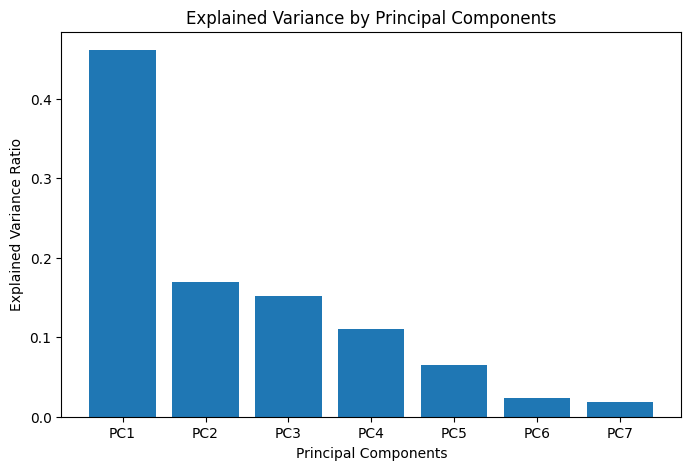

In [8]:
# Plot the explained variance
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, tick_label=[f'PC{i+1}' for i in range(len(explained_variance))])
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.title('Explained Variance by Principal Components')
plt.show()

# Create a Biplot

## At first we decide to plot PC1 vs PC2 and PC1 vs PC2 vs PC3

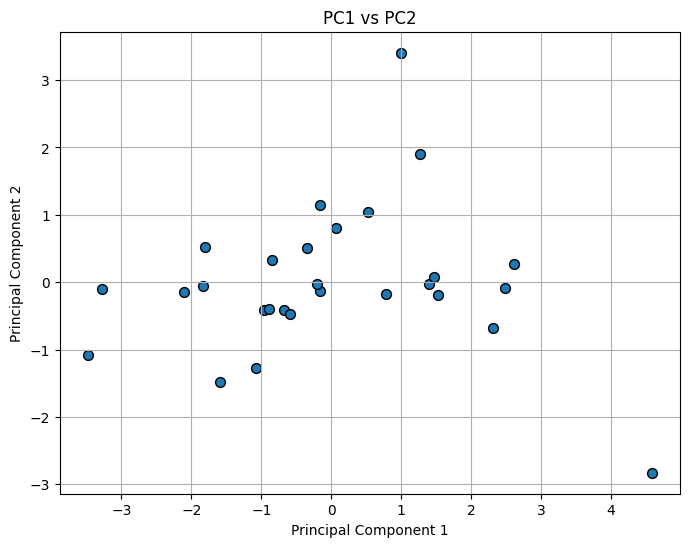

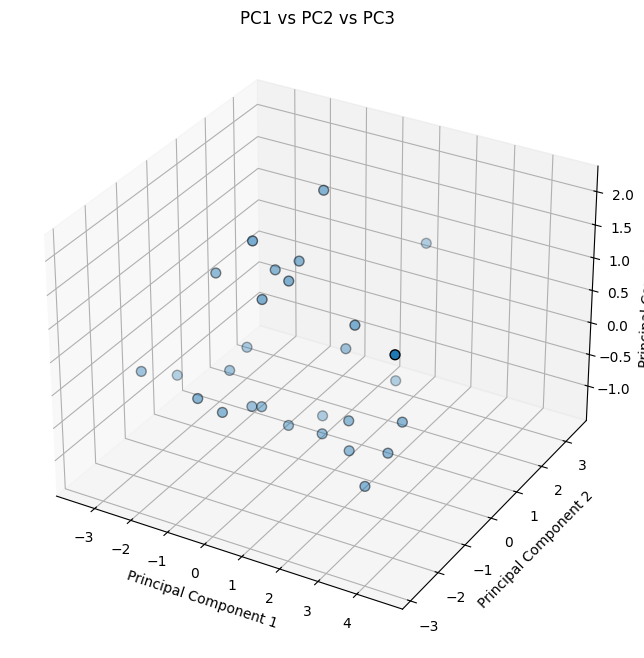

In [9]:
# Plot 2D scatter of PC1 vs PC2
plt.figure(figsize=(8, 6))
plt.scatter(pca_df_manual['PC1'], pca_df_manual['PC2'], edgecolor='k', s=50)
plt.title('PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Plot 3D scatter of PC1 vs PC2 vs PC3
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_df_manual['PC1'], pca_df_manual['PC2'], pca_df_manual['PC3'], edgecolor='k', s=50)

ax.set_title('PC1 vs PC2 vs PC3')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

In [13]:
# Create the 3D scatter plot
fig = px.scatter_3d(pca_df_manual, x='PC1', y='PC2', z='PC3',
                    title="PC1 vs PC2 vs PC3",
                    labels={'PC1': 'Principal Component 1',
                            'PC2': 'Principal Component 2',
                            'PC3': 'Principal Component 3'},
                    opacity=0.8)

# Update marker size and color if needed
fig.update_traces(marker=dict(size=6, color=pca_df_manual['PC1'], colorscale='Viridis'))

# Show the plot
fig.show()

## Then, we did the Biplot

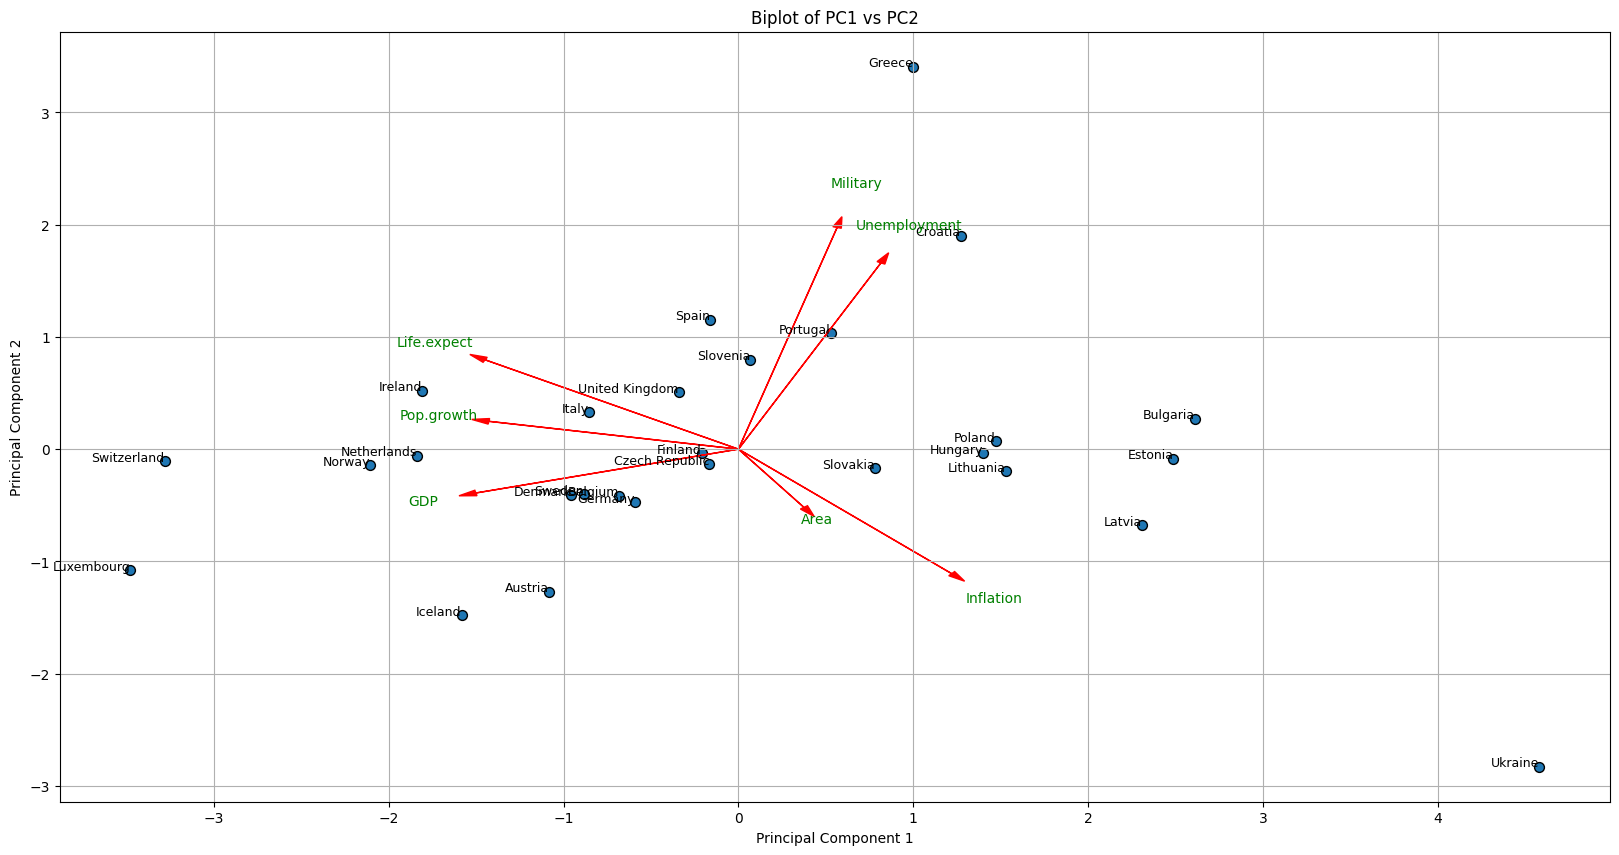

In [16]:
# Step 1: Plot the scatter of the principal components (PC1 vs PC2)
plt.figure(figsize=(20, 10))
plt.scatter(pca_df_manual['PC1'], pca_df_manual['PC2'], edgecolor='k', s=50)

# Step 2: Add labels to each point (country names)
for i, country in enumerate(europe_data['Country']):
    plt.text(pca_df_manual['PC1'][i], pca_df_manual['PC2'][i], country, fontsize=9, ha='right')

# Step 3: Plot the original feature vectors (arrows)
# Scaling factor to make arrows visible in the plot
scaling_factor = 3
for i in range(len(eigenvectors)):  # Loop through each feature
    plt.arrow(0, 0, 
              eigenvectors[i, 0] * scaling_factor,  # PC1 loading
              eigenvectors[i, 1] * scaling_factor,  # PC2 loading
              color='r', head_width=0.05, head_length=0.1)
    plt.text(eigenvectors[i, 0] * scaling_factor * 1.2, 
             eigenvectors[i, 1] * scaling_factor * 1.2, 
             numeric_data.columns[i], color='g', ha='center', va='center')

# Add titles and labels
plt.title('Biplot of PC1 vs PC2')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Add grid
plt.grid(True)

# Show the plot
plt.show()

In [31]:
# Create a scatter plot with hover labels for countries
fig = go.Figure()

# Step 1: Add scatter plot for countries (PC1 vs PC2) with hover labels
fig.add_trace(go.Scatter(
    x=pca_df_manual['PC1'], 
    y=pca_df_manual['PC2'], 
    mode='markers+text',  # Allows markers and hovering text
    text=europe_data['Country'],  # Country names as hover text
    marker=dict(size=10, color='blue', line=dict(width=2, color='DarkSlateGrey')),
    textfont=dict(size=12),  # Set the size of the text labels
    hoverinfo='text'  # Shows country name when hovering
))

# Step 2: Add arrows for the original feature vectors (eigenvectors) with labels
scaling_factor = 3
for i, feature in enumerate(numeric_data.columns):
    fig.add_trace(go.Scatter(
        x=[0, eigenvectors[i, 0] * scaling_factor],
        y=[0, eigenvectors[i, 1] * scaling_factor],
        mode='lines+text',
        line=dict(color='red', width=3),
        text=[None, feature],  # Label at the end of the eigenvector (arrow)
        textposition='middle right',  # Position of the label
        hoverinfo='text',  # Shows feature name when hovering
        showlegend=False
    ))

# Step 3: Update layout for better visuals and set the figure size
fig.update_layout(
    title="Interactive Biplot of PC1 vs PC2",
    xaxis_title="Principal Component 1",
    yaxis_title="Principal Component 2",
    showlegend=False,
    hovermode='closest',
    width=1000,  # Set the width of the entire figure (in pixels)
    height=800,  # Set the height of the entire figure (in pixels)
)

# Show the plot
fig.show()

In [25]:
# Create a 3D scatter plot for PC1, PC2, and PC3
fig = go.Figure()

# Step 1: Add scatter plot for countries (PC1 vs PC2 vs PC3) with hover labels
fig.add_trace(go.Scatter3d(
    x=pca_df_manual['PC1'], 
    y=pca_df_manual['PC2'], 
    z=pca_df_manual['PC3'], 
    mode='markers',
    text=europe_data['Country'],  # Country names as hover text
    marker=dict(size=8, color='blue', opacity=0.8),
    hoverinfo='text'  # Shows country name when hovering
))

# Step 2: Add arrows for the original feature vectors (eigenvectors) in 3D
scaling_factor = 3
for i, feature in enumerate(numeric_data.columns):
    fig.add_trace(go.Scatter3d(
        x=[0, eigenvectors[i, 0] * scaling_factor],
        y=[0, eigenvectors[i, 1] * scaling_factor],
        z=[0, eigenvectors[i, 2] * scaling_factor],
        mode='lines+text',
        line=dict(color='red', width=5),
        text=[feature],
        textposition="top center",
        hoverinfo='text'
    ))

# Step 3: Update layout for better visuals
fig.update_layout(
    title="Interactive 3D Biplot of PC1 vs PC2 vs PC3",
    scene=dict(
        xaxis_title="Principal Component 1",
        yaxis_title="Principal Component 2",
        zaxis_title="Principal Component 3"
    ),
    showlegend=False
)

# Show the plot
fig.show()

# Loadings Analysis

## PC1 vs Countries

If PC1 is primarily influenced by GDP, Life Expectancy, and Population Growth (with positive loadings), and negatively by Unemployment and Inflation:

* Countries with high PC1 values: These countries likely have higher GDP, longer life expectancy, and higher population growth rates. They are doing well economically and socially.
* Countries with low PC1 values: These countries might have lower GDP, shorter life expectancy, higher unemployment, and higher inflation rates. They might be struggling with economic challenges.

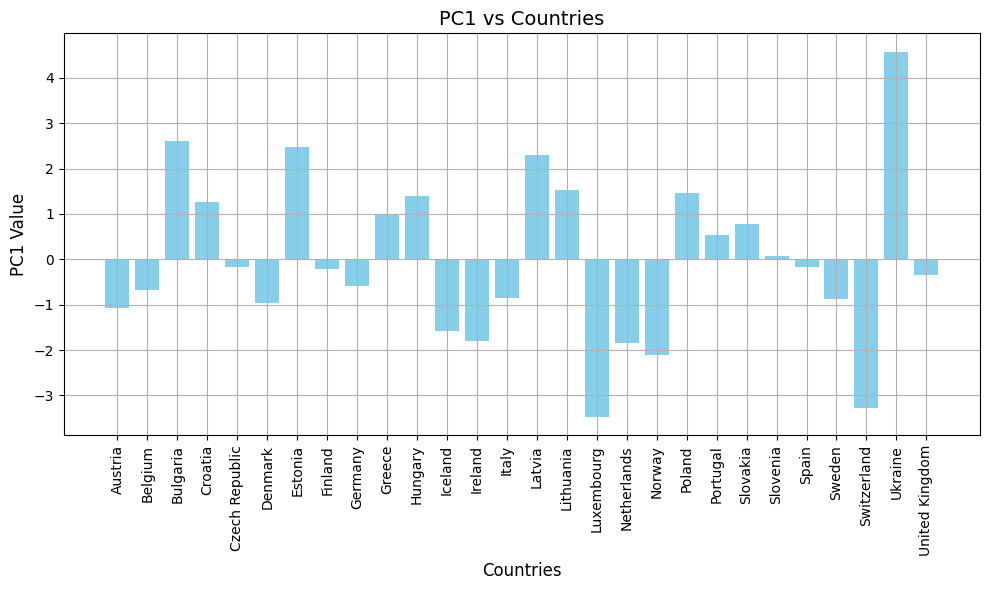

In [32]:
# Assuming pca_df_manual contains the principal components and europe_data['Country'] contains country names

# Step 1: Prepare the data for the plot (PC1 vs Country)
countries = europe_data['Country']
pc1_values = pca_df_manual['PC1']

# Step 2: Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(countries, pc1_values, color='skyblue')

# Step 3: Add labels and title
plt.title('PC1 vs Countries', fontsize=14)
plt.xlabel('Countries', fontsize=12)
plt.ylabel('PC1 Value', fontsize=12)
plt.xticks(rotation=90)  # Rotate country names for better readability
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

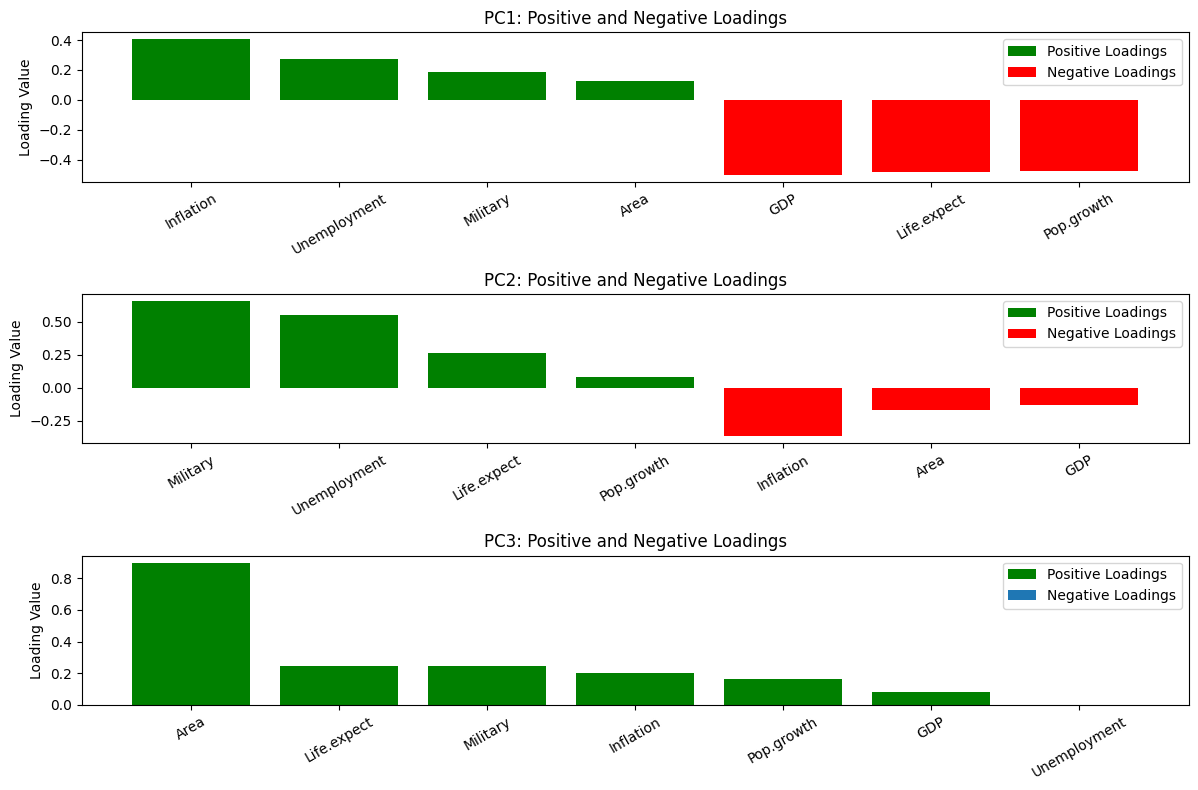

In [46]:
# Step 1: Get the loadings for PC1, PC2, and PC3
pc1_loadings = loadings_df['PC1']
pc2_loadings = loadings_df['PC2']
pc3_loadings = loadings_df['PC3']

# Step 2: Separate positive and negative loadings for each principal component
positive_loadings_pc1 = pc1_loadings[pc1_loadings > 0].sort_values(ascending=False)
negative_loadings_pc1 = pc1_loadings[pc1_loadings < 0].sort_values()

positive_loadings_pc2 = pc2_loadings[pc2_loadings > 0].sort_values(ascending=False)
negative_loadings_pc2 = pc2_loadings[pc2_loadings < 0].sort_values()

positive_loadings_pc3 = pc3_loadings[pc3_loadings > 0].sort_values(ascending=False)
negative_loadings_pc3 = pc3_loadings[pc3_loadings < 0].sort_values()

# Step 3: Plot positive and negative loadings for each principal component
import matplotlib.pyplot as plt

# Plotting loadings for PC1
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.bar(positive_loadings_pc1.index, positive_loadings_pc1.values, color='green', label='Positive Loadings')
plt.bar(negative_loadings_pc1.index, negative_loadings_pc1.values, color='red', label='Negative Loadings')
plt.title('PC1: Positive and Negative Loadings')
plt.ylabel('Loading Value')
plt.xticks(rotation=30)
plt.legend()

# Plotting loadings for PC2
plt.subplot(3, 1, 2)
plt.bar(positive_loadings_pc2.index, positive_loadings_pc2.values, color='green', label='Positive Loadings')
plt.bar(negative_loadings_pc2.index, negative_loadings_pc2.values, color='red', label='Negative Loadings')
plt.title('PC2: Positive and Negative Loadings')
plt.ylabel('Loading Value')
plt.xticks(rotation=30)
plt.legend()

# Plotting loadings for PC3
plt.subplot(3, 1, 3)
plt.bar(positive_loadings_pc3.index, positive_loadings_pc3.values, color='green', label='Positive Loadings')
plt.bar(negative_loadings_pc3.index, negative_loadings_pc3.values, color='red', label='Negative Loadings')
plt.title('PC3: Positive and Negative Loadings')
plt.ylabel('Loading Value')
plt.xticks(rotation=30)
plt.legend()

plt.tight_layout()
plt.show()

**Positive Loadings:**

* Inflation, Unemployment, and Military have positive loadings, indicating that higher values of these variables push a country towards a higher PC1 score.
  * Countries with higher Inflation and Unemployment will have higher PC1 values.
  * Military expenditure also positively influences PC1, but its contribution is smaller compared to inflation and unemployment.
  
**Negative Loadings:**

  * GDP, Life Expectancy, and Population Growth have negative loadings, indicating that higher values of these variables pull a country towards lower PC1 values.
    * Countries with high GDP, Life Expectancy, and Population Growth will have lower PC1 values.

PC1 is related with an economic and social state. Countries with lower economic performance (higher inflation and unemployment) tend to have higher PC1 scores, while countries with better economic and social indicators (higher GDP, life expectancy, and population growth) tend to have lower PC1 scores.

This could suggest that PC1 distinguishes between countries with strong economic growth versus those facing economic challenges.